## 3. **jpj_3_player_classification_data_prep**
In this notebook, a dataset for the different players was created with features relating to:
- Geographic & Demographic Traits,
- Behavioral Traits, and
- Value Traits

The final dataset had *17313* rows, i.e. different player profiles
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

In [2]:
df_players = pd.read_pickle('./cleanedData/player_details.pkl')
df_tran    = pd.read_pickle('./cleanedData/tran.pkl')
df_games   = pd.read_pickle('./cleanedData/games.pkl')

# Plan of action for clustering of players
I shall add features to players dataset such that I can be able to have info on:
 - Geographic & Demographic Traits
 - Behavioral Traits, and 
 - Value Traits


### Geographic and Demographic Categories
Based on viz2 we can see that country is segmenting the dataset. This will be used as one of the features.

viz3 indicates that player age is also a disctriminator within the dataset. However, rather than using the individual player age, the Millinnial banding will be used.

In [3]:
# extracting unique playerid, together with selected features from geographic and demographic
df = df_players[['playerid','Country','MillenialBanding_INT']]
print('Number of unique players before dropping NaNs: {}'.format(df.shape[0]))
df.drop_duplicates(inplace=True)
print('Number of unique players after dropping duplicates: {}'.format(df.shape[0]))
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print('-->Dropping 7.61% of the data identifyed from jpj_1_get_data notebook')
print('Number of unique players after dropping NaNs: {}'.format(df.shape[0]))

Number of unique players before dropping NaNs: 45864
Number of unique players after dropping duplicates: 45864
-->Dropping 7.61% of the data identifyed from jpj_1_get_data notebook
Number of unique players after dropping NaNs: 42361


In [4]:
#retain only does players which have transaction information
df = df[df['playerid'].isin( list(set(df_tran['playerid'])) )]
print('Number of unique players with transactional information: {}'.format(df.shape[0]))

Number of unique players with transactional information: 17647


### Behavioral & Value Traits

In [5]:
# Deposit - avg amount and avg transaction
dt = df_tran[(df_tran['trans_type']=='DEPOSIT')]
dt = dt[(dt['payment_status'] == 'ACCEPTED') | (dt['payment_status'] == 'UNK')]
dt1 = dt.groupby(['playerid'],as_index=False)[['amount_EUR']].mean()
dt1.columns = ['playerid','amount_EUR_AVG_DEPOSIT']
df = pd.merge(df, dt1, how='left',on='playerid')
dt2 = dt.groupby(['playerid'],as_index=False)[['amount_EUR','transaction_count']].sum()
dt2['avg_transaction_amount_EUR_DEPOSIT'] = dt2['amount_EUR']/dt2['transaction_count']
dt2.drop(['amount_EUR','transaction_count'],inplace=True, axis=1)
df = pd.merge(df, dt2, how='left',on='playerid')
print('Number of unique players - DEPOSIT: {}'.format(df.shape[0]))

# Withdraw 
dt = df_tran[(df_tran['trans_type']=='WITHDRAW') & (df_tran['payment_status'] != 'CANCELLED')]
dt1 = dt.groupby(['playerid'],as_index=False)[['amount_EUR']].mean()
dt1.columns = ['playerid','amount_EUR_AVG_WITHDRAW']
df = pd.merge(df, dt1, how='left',on='playerid')
dt2 = dt.groupby(['playerid'],as_index=False)[['amount_EUR','transaction_count']].sum()
dt2['avg_transaction_amount_EUR_WITHDRAW'] = dt2['amount_EUR']/dt2['transaction_count']
dt2.drop(['amount_EUR','transaction_count'],inplace=True, axis=1)
df = pd.merge(df, dt2, how='left',on='playerid')
print('Number of unique players - WITHDRAW: {}'.format(df.shape[0]))

# Wager
dt = df_tran[(df_tran['trans_type']=='WAGER')]
dt1 = dt.groupby(['playerid'],as_index=False)[['amount_EUR']].mean()
dt1.columns = ['playerid','amount_EUR_AVG_WAGER']
df = pd.merge(df, dt1, how='left',on='playerid')
dt2 = dt.groupby(['playerid'],as_index=False)[['amount_EUR','transaction_count']].sum()
dt2['avg_transaction_amount_EUR_WAGER'] = dt2['amount_EUR']/dt2['transaction_count']
dt2.drop(['amount_EUR','transaction_count'],inplace=True, axis=1)
df = pd.merge(df, dt2, how='left',on='playerid')
print('Number of unique players - WAGER: {}'.format(df.shape[0]))

# winning
dt = df_tran[(df_tran['trans_type']=='WINNING')]
dt1 = dt.groupby(['playerid'],as_index=False)[['amount_EUR']].mean()
dt1.columns = ['playerid','amount_EUR_AVG_WINNING']
df = pd.merge(df, dt1, how='left',on='playerid')
dt2 = dt.groupby(['playerid'],as_index=False)[['amount_EUR','transaction_count']].sum()
dt2['avg_transaction_amount_EUR_WINNING'] = dt2['amount_EUR']/dt2['transaction_count']
dt2.drop(['amount_EUR','transaction_count'],inplace=True, axis=1)
df = pd.merge(df, dt2, how='left',on='playerid')
print('Number of unique players - WINNING: {}'.format(df.shape[0]))

Number of unique players - DEPOSIT: 17647
Number of unique players - WITHDRAW: 17647
Number of unique players - WAGER: 17647
Number of unique players - WINNING: 17647


In [6]:
# Bonus Avg Winning and Avg Wager
dt = df_tran[df_tran['account_type'].isin( ['BONUS_GENERIC','BONUS_LOCKED','BONUS_RESTRICTED']) ]
dt1 = dt[dt['trans_type']=='WAGER']
dt1 = dt1.groupby(['playerid'],as_index=False)[['amount_EUR','transaction_count']].sum()
dt1['avg_Bonus_transaction_amount_EUR_WAGER'] = dt1['amount_EUR']/dt1['transaction_count']
dt1.drop(['amount_EUR','transaction_count'],inplace=True, axis=1)
df = pd.merge(df, dt1, how='left',on='playerid')
dt1 = dt[dt['trans_type']=='WINNING']
dt1 = dt1.groupby(['playerid'],as_index=False)[['amount_EUR','transaction_count']].sum()
dt1['avg_Bonus_transaction_amount_EUR_WINNING'] = dt1['amount_EUR']/dt1['transaction_count']
dt1.drop(['amount_EUR','transaction_count'],inplace=True, axis=1)
df = pd.merge(df, dt1, how='left',on='playerid')
print('Number of unique players - BONUS: {}'.format(df.shape[0]))

Number of unique players - BONUS: 17647


In [7]:
# The above set of features could have NaN values. These where replaced with 0
df[['amount_EUR_AVG_DEPOSIT',
    'avg_transaction_amount_EUR_DEPOSIT',
    'amount_EUR_AVG_WITHDRAW',
    'avg_transaction_amount_EUR_WITHDRAW',
    'amount_EUR_AVG_WAGER',
    'avg_transaction_amount_EUR_WAGER',
    'amount_EUR_AVG_WINNING',
    'avg_transaction_amount_EUR_WINNING',
    'avg_Bonus_transaction_amount_EUR_WAGER',
    'avg_Bonus_transaction_amount_EUR_WINNING']] = df[['amount_EUR_AVG_DEPOSIT',
    'avg_transaction_amount_EUR_DEPOSIT',
    'amount_EUR_AVG_WITHDRAW',
    'avg_transaction_amount_EUR_WITHDRAW',
    'amount_EUR_AVG_WAGER',
    'avg_transaction_amount_EUR_WAGER',
    'amount_EUR_AVG_WINNING',
    'avg_transaction_amount_EUR_WINNING',
    'avg_Bonus_transaction_amount_EUR_WAGER',
    'avg_Bonus_transaction_amount_EUR_WINNING']].fillna(value = 0)

In [8]:
# Different games played, channel,gameid_root
dt = pd.merge(df_tran, df_games, how='left', on='gameid')
dt = dt[dt['trans_type']=='WAGER']
# CHANNEL - favourite, hoursplayed, stickiness
dt0 = dt.groupby(['playerid','created_date_time','channel'],as_index=False)[['amount_EUR']].sum()
dt1 = dt0.groupby(['playerid','channel'],as_index=False)[['created_date_time']].count()
dt2 = dt1.groupby(['playerid'],as_index=False)[['created_date_time']].max()
dt3 = pd.merge(dt2,dt1, how='left', on=['playerid','created_date_time'])
dt3.columns = ['playerid','favourite_channel_hours_played','channel']
dt33 = dt3.groupby(['playerid'],as_index=False)[['channel']].max()
dt3 = pd.merge(dt33,dt3, how='left', on=['playerid','channel'])

dt4 = dt1.groupby(['playerid'],as_index=False)[['created_date_time']].sum()
dt4.columns = ['playerid','total_hours_played']
dt5 = pd.merge(dt3, dt4, how='left', on=['playerid'])
dt5['stickiness_to_channel'] = dt5['favourite_channel_hours_played']/dt5['total_hours_played']
dt5.drop(['total_hours_played'],inplace=True,axis=1)
df = pd.merge(df, dt5, how='left',on='playerid')
print('Number of unique players - CHANNEL: {}'.format(df.shape[0]))

# # CATEGORYCODE - favourite, hoursplayed, stickiness
dt0 = dt.groupby(['playerid','created_date_time','categorycode'],as_index=False)[['amount_EUR']].sum()
dt1 = dt0.groupby(['playerid','categorycode'],as_index=False)[['created_date_time']].count()
dt2 = dt1.groupby(['playerid'],as_index=False)[['created_date_time']].max()
dt3 = pd.merge(dt2,dt1, how='left', on=['playerid','created_date_time'])
dt3.columns = ['playerid','favourite_categorycode_hours_played','categorycode']
dt33 = dt3.groupby(['playerid'],as_index=False)[['categorycode']].max()
dt3 = pd.merge(dt33, dt3, how='left', on=['playerid','categorycode'])

dt4 = dt1.groupby(['playerid'],as_index=False)[['created_date_time']].sum()
dt4.columns = ['playerid','total_hours_played']
dt5 = pd.merge(dt3, dt4, how='left', on=['playerid'])
dt5['stickiness_to_categorycode'] = dt5['favourite_categorycode_hours_played']/dt5['total_hours_played']
dt5.drop(['total_hours_played'],inplace=True,axis=1)
df = pd.merge(df, dt5, how='left',on='playerid')
print('Number of unique players - CATEGORYCODE: {}'.format(df.shape[0]))

# gameid_root - favourite, hoursplayed, stickiness
dt0 = dt.groupby(['playerid','created_date_time','gameid_root'],as_index=False)[['amount_EUR']].sum()
dt1 = dt0.groupby(['playerid','gameid_root'],as_index=False)[['created_date_time']].count()
dt2 = dt1.groupby(['playerid'],as_index=False)[['created_date_time']].max()
dt3 = pd.merge(dt2,dt1, how='left', on=['playerid','created_date_time'])
dt3.columns = ['playerid','favourite_gameid_root_hours_played','gameid_root']
dt33 = dt3.groupby(['playerid'],as_index=False)[['gameid_root']].max()
dt3 = pd.merge(dt33, dt3, how='left', on=['playerid','gameid_root'])

dt4 = dt1.groupby(['playerid'],as_index=False)[['created_date_time']].sum()
dt4.columns = ['playerid','total_hours_played']
dt5 = pd.merge(dt3, dt4, how='left', on=['playerid'])
dt5['stickiness_to_gameid_root'] = dt5['favourite_gameid_root_hours_played']/dt5['total_hours_played']
dt5.drop(['total_hours_played'],inplace=True,axis=1)
df = pd.merge(df, dt5, how='left',on='playerid')
print('Number of unique players - GAMEID_ROOT: {}'.format(df.shape[0]))

Number of unique players - CHANNEL: 17647
Number of unique players - CATEGORYCODE: 17647
Number of unique players - GAMEID_ROOT: 17647


In [9]:
#  What is his style of gaming? Frequency? Weekend or Weekday Dominant? During which time does he game the most?
dt = df_tran[df_tran['trans_type']=='WAGER']

# Frequency of play over 90 days?
dt1 = dt.groupby(['playerid','created_date'],as_index=False)[['amount_EUR']].sum()
dt1 = dt1.groupby(['playerid'],as_index=False)[['created_date']].count()
dt1.columns = ['playerid','frequency_of_play']
dt1['frequency_of_play'] = dt1['frequency_of_play']/90
df = pd.merge(df, dt1, how='left',on='playerid')
print('Number of unique players - FREQ OF PLAY: {}'.format(df.shape[0]))

# Is he a Weekend Or Weekday player
dt2 = dt.groupby(['playerid','created_date','created_weekend'],as_index=False)[['amount_EUR']].sum()
dt2 = dt2.groupby(['playerid','created_weekend'],as_index=False)[['created_date']].count()
dt3 = dt2.groupby(['playerid'],as_index=False)[['created_date']].max()
dt4 = pd.merge(dt3,dt2, how='left',on=['playerid','created_date'])
dt4.drop(['created_date'], inplace=True, axis=1)
dt4.columns = ['playerid','FreqentWeekendPlayer']
dt44 = dt4.groupby(['playerid'],as_index=False)[['FreqentWeekendPlayer']].max()
dt4 = pd.merge(dt44, dt4, how='left', on=['playerid','FreqentWeekendPlayer'])
df = pd.merge(df, dt4, how='left',on='playerid')
print('Number of unique players - WEEKEND PLAYER: {}'.format(df.shape[0]))

# Time of Day 
dt2 = dt.groupby(['playerid','created_date','created_time_of_day'],as_index=False)[['amount_EUR']].sum()
dt2 = dt2.groupby(['playerid','created_time_of_day'],as_index=False)[['created_date']].count()
dt3 = dt2.groupby(['playerid'],as_index=False)[['created_date']].max()
dt4 = pd.merge(dt3,dt2, how='left',on=['playerid','created_date'])
dt5 = dt4.groupby(['playerid'],as_index=False)[['created_time_of_day']].max()
dt6 = pd.merge(dt5,dt4, how='left',on=['playerid','created_time_of_day'])
dt6.drop(['created_date'], inplace=True, axis=1)
dt6.columns = ['playerid','FreqentTimeOfDayPlay']
df = pd.merge(df, dt6, how='left',on='playerid')
print('Number of unique players - TIME OF DAY: {}'.format(df.shape[0]))

Number of unique players - FREQ OF PLAY: 17647
Number of unique players - WEEKEND PLAYER: 17647
Number of unique players - TIME OF DAY: 17647


In [10]:
# Player Actual RTP
dt = pd.merge(df_tran, df_games, how='left', on='gameid')
dt = dt[(dt['trans_type']=='WINNING') | (dt['trans_type']=='WAGER')]
dt1 = dt.groupby(['playerid','trans_type'],as_index=False)[['amount_EUR']].sum()
dt1['amount_EUR'] = abs(dt1['amount_EUR'])

dt2 = dt1[dt1['trans_type'] == 'WAGER']
dt2.drop(['trans_type'], inplace=True, axis=1)
dt2.columns = ['playerid','WAGER']

dt3 = dt1[dt1['trans_type'] == 'WINNING']
dt3.drop(['trans_type'], inplace=True, axis=1)
dt3.columns = ['playerid','WINNING']

dt4 = pd.merge(dt2,dt3, how='left', on ='playerid')
dt4['WINNING'].fillna(0, inplace=True)
dt4['RTP_actual'] = dt4['WINNING'] / dt4['WAGER']
dt4.drop(['WAGER','WINNING'], inplace=True, axis=1)
df = pd.merge(df, dt4, how='left',on='playerid')
print('Number of unique players - ACTUAL RTP: {}'.format(df.shape[0]))

Number of unique players - ACTUAL RTP: 17647


In [12]:
# need to replace categorical columns with int
#  Country,channel
df['Country'] = df['Country'].astype('category')
df['Country'] = df['Country'].cat.codes
df['channel'] = df['channel'].astype('category')
df['channel'] = df['channel'].cat.codes
df['categorycode'] = df['categorycode'].astype('category')
df['categorycode'] = df['categorycode'].cat.codes

# Final clean up and Quick Investigation of these Features

In [23]:
# df['PlayerClassifier'] = df['avg_transaction_amount_EUR_WAGER'] * df['frequency_of_play'] 
# df['PlayerClassifier_Norm'] = ( df['PlayerClassifier'] - df['PlayerClassifier'].mean() ) / df['PlayerClassifier'].std(ddof=0)
# plt.scatter(x = df['avg_transaction_amount_EUR_WAGER'], 
#             y = df['frequency_of_play'], 
#             c = df['PlayerClassifier_Norm'])
# plt.xlabel('avg_transaction_amount_EUR_WAGER')
# plt.ylabel('frequency_of_play')
# plt.show()

In [16]:
# dt0 = df[df['avg_transaction_amount_EUR_WAGER']> -20]
# plt.scatter(x = dt0['avg_transaction_amount_EUR_WAGER'], 
#             y = dt0['frequency_of_play'], 
#             c = dt0['PlayerClassifier_Norm'])
# plt.xlabel('avg_transaction_amount_EUR_WAGER')
# plt.ylabel('frequency_of_play')
# plt.show()

In [17]:
def missingValues(data):  
    total = data.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (data.isnull().sum() / data.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
missingValues(df)

,Total,Percent
RTP_actual,334,1.892673
FreqentWeekendPlayer,334,1.892673
frequency_of_play,334,1.892673
stickiness_to_gameid_root,334,1.892673
favourite_gameid_root_hours_played,334,1.892673
gameid_root,334,1.892673
stickiness_to_categorycode,334,1.892673
favourite_categorycode_hours_played,334,1.892673
stickiness_to_channel,334,1.892673
favourite_channel_hours_played,334,1.892673


In [18]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print('-->Dropping 2% of the data identifyed above')
print('Number of unique players after dropping NaNs: {}'.format(df.shape[0]))

-->Dropping 2% of the data identifyed above
Number of unique players after dropping NaNs: 17313


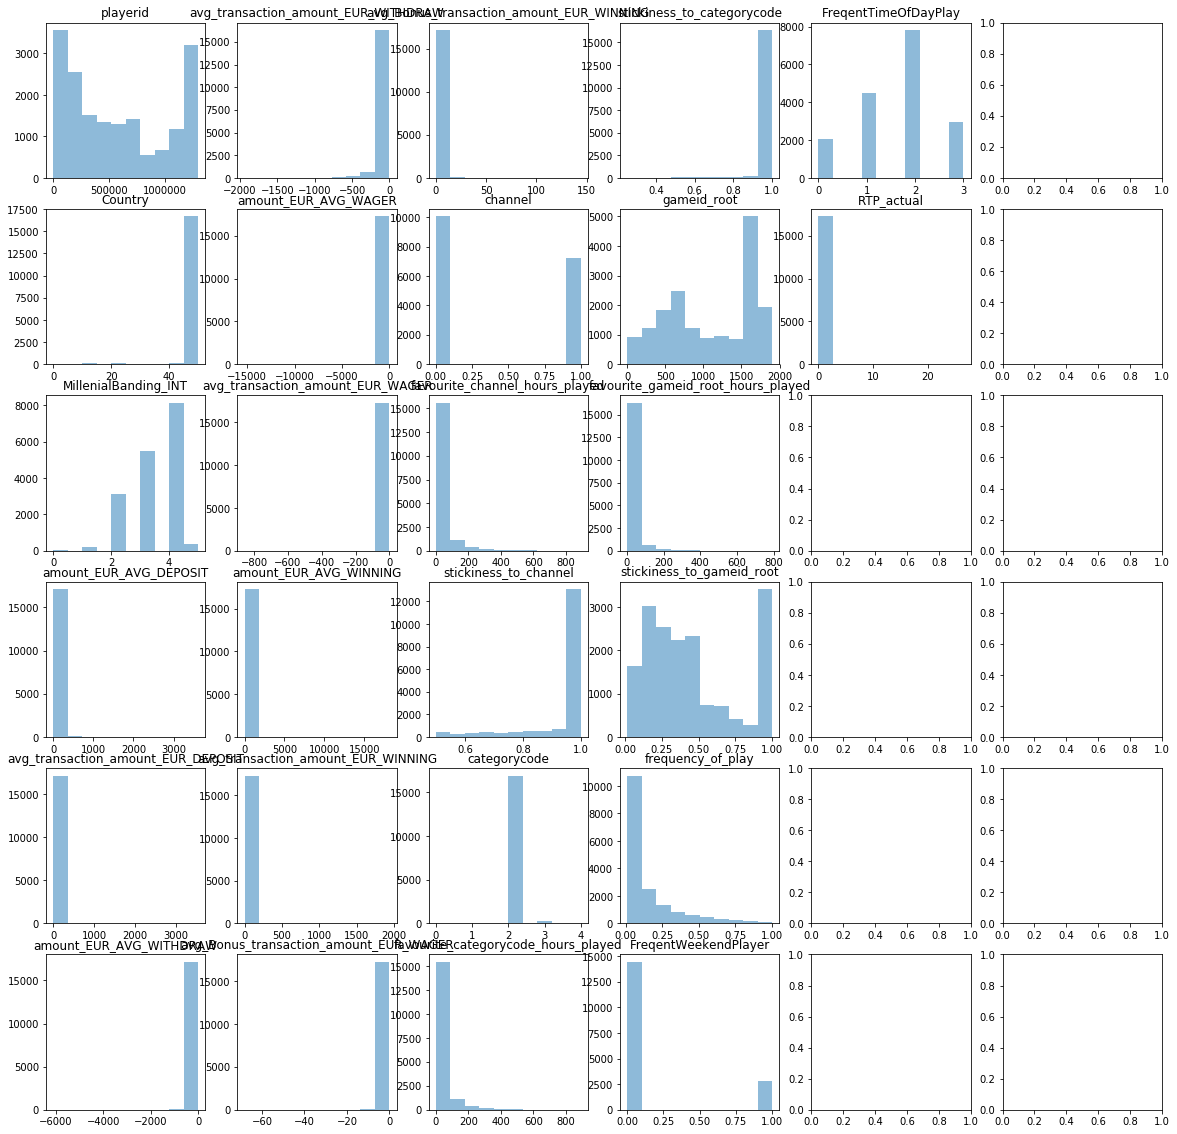

In [21]:
fig, ax  = plt.subplots(nrows=6,ncols=6, figsize=(20,20))
i = 0
j = 0
for ind, col in enumerate(df):
    if ((ind%6 ==0) & (ind > 1)):
              j+=1
    ax[ind % 6,j].hist(df[col].values, alpha=.5)
    ax[ind % 6,j].set_title(col)

Looking at the plots, we have a mix of features. Some are categorical, for example *FreqentTimeToPlay* groups the players int 4, whereas *Stickiness_to_gameid_root* is continous. Interestingly with *Stickiness_to_gameid_root* we are getting  2 groupings. Some players tend to move around quite a bit in between games , with a stickiness value of less than 25%, whereas another group of players play 1 game and stick with it (100%).


Going forward, I shall proceed as follows:
1. Create a clustering for the players based on the above dataset
2. Classify the players into these clusters and model

In [ ]:
df.to_pickle('./cleanedData/modelling_data.pkl')